Has the network latency gone up since we switched internet service providers?
Is the website redesign any good?
Is our television ad driving more sales?

1.Answer with the type of test you would use (assume normal distribution):

    Is there a difference in grades of students on the second floor compared to grades of all students?

    Are adults who drink milk taller than adults who dont drink milk?

    Is the the price of gas higher in texas or in new mexico?

    Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

# is there a difference in grades of students on the second floor compared to grades of all students?
independent t-test

# Are adults who drink milk taller than adults who dont drink milk?
independent t-test

# Is the the price of gas higher in texas or in new mexico?
independent t-test

# Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
ANOVA

2.Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from scipy import stats
from env import host, username, password
a_sample = 40
b_sample = 50
a_mean = 90
b_mean = 100
a_std = 15
b_std = 20
alpha = .05
df_a = pd.DataFrame(np.random.normal(a_mean, a_std, a_sample))
df_b = pd.DataFrame(np.random.normal(b_mean, b_std, b_sample))

array([[<Axes: title={'center': '0'}>]], dtype=object)

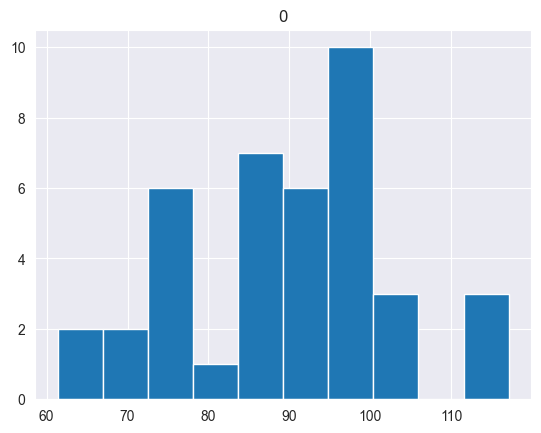

In [3]:
df_a.hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

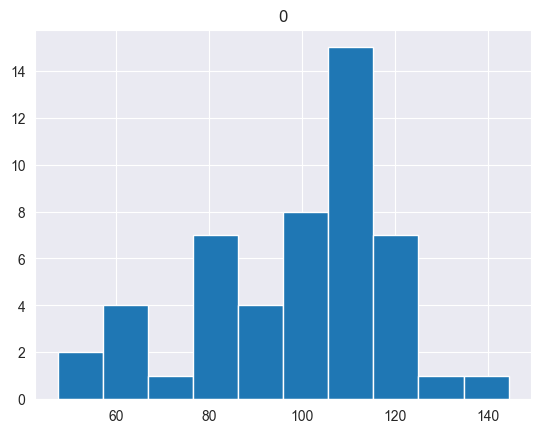

In [4]:
df_b.hist()

$H{o}$: office 1 and office 2 have the same average time to sell a home
$H{a}$: office 1 and office 2 do not have the same average time to sell a home

In [5]:
print(df_a.var())
print(df_b.var())

0    173.950372
dtype: float64
0    453.335503
dtype: float64


In [6]:
t, p = stats.ttest_ind(df_a, df_b, equal_var=False)
t, p

(array([-2.34028861]), array([0.02166285]))

In [7]:
print("is p/2 < alpha?", p < alpha)
print("is t > 0?", t > 0)

is p < alpha? [ True]
is t > 0? [False]


In [8]:
if p < alpha and t > 0:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

fail to reject the null hypothesis



3.Load the mpg dataset and use it to answer the following questions:

    Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [9]:
df_mpg = data('mpg')
df_mpg['average_mileage'] = (df_mpg.cty + df_mpg.hwy) / 2
df_mpg_1999 = df_mpg[df_mpg.year == 1999]
df_mpg_2008 = df_mpg[df_mpg.year == 2008]

$H{o}$: there is no difference in fuel-efficiency in cars from 1999 vs 2008
$H{a}$: there is a difference in fuel-efficiency in cars from 1999 vs 2008

In [10]:
print(df_mpg_1999.average_mileage.var())
print(df_mpg_2008.average_mileage.var())

27.122605363984682
24.097480106100797


In [11]:
t, p = stats.ttest_ind(df_mpg_1999.average_mileage, df_mpg_2008.average_mileage, equal_var=False)

In [12]:
print("is p < alpha?", p < alpha)
print("is t > 0?", t > 0)

is p < alpha? False
is t > 0? True


In [13]:
if p/2 < alpha and t > 0:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

fail to reject the null hypothesis


    Are compact cars more fuel-efficient than the average car?

In [14]:
df_mpg
df_compact = df_mpg[df_mpg['class'] == 'compact']

$H {o}$: compact cars are not more fuel-efficient than the average car
$H {a}$: compact cars are more fuel-efficient than the average car

In [15]:
print(df_compact.average_mileage.var())
print(df_mpg.average_mileage.var())

12.442876965772433
25.50542900113715


In [16]:
t, p = stats.ttest_1samp(df_compact.average_mileage, df_mpg.average_mileage.mean())
t, p

(7.896888573132533, 4.198563794317163e-10)

In [27]:
print("is p < alpha?", p < alpha)
print("is t > 0?", t > 0)

is p/2 < alpha? True
is t > 0? True


In [25]:
if p < alpha and t > 0:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis



    Do manual cars get better gas mileage than automatic cars?

In [19]:
df_manual = df_mpg[df_mpg["trans"].str.contains("manual")]
df_auto = df_mpg[df_mpg["trans"].str.contains("auto")]

$H {o}$: manual cars do not get better gas mileage than automatic cars
$H {a}$: manual cars get better gas mileage than automatic cars

In [20]:
print(df_manual.average_mileage.var())
print(df_auto.average_mileage.var())

26.635167464114826
21.942777233382337


In [21]:
t, p = stats.ttest_ind(df_manual.average_mileage, df_auto.average_mileage, equal_var=False)
t, p

(4.443514012903072, 1.7952248999917893e-05)

In [22]:
print("is p < alpha?", p < alpha)
print("is t > 0?", t > 0)

is p < alpha? True
is t > 0? True


In [23]:
if p < alpha and t > 0:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

reject the null hypothesis
